# Project Title: Boston Housing Prediction Model Using Linear Regression

# About The Dataset
<hr>
    The Boston housing *dataset* is a sample dataset tat provides median values of homes in different areas around Boston. Along with the median home values in $1000 (MEDV), crime(CRIM), nitric oxide concetration(NOX), the average number of rooms(RM), percentage of lower status of the population(LSTAT), and other features are provided. Our objective is to predict median home price(MEDV), the target in ths scenaio, using some features provided.
    
    
The data is built in sciki-learn and we will use load_boston to load the project that contains all the information.

# Objective
To predict the Median Home Value **(MEDV)**, the target variable using some features provided.

- Crime(CRIM)
- Nitric Oxide Concentration(NOX)
- Average Number of Rooms (RM)
- Percentage of lower status of the population(LSTAT)

In [20]:
# Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [22]:
df = pd.read_csv("../Boston Housing Prediction Model/HousingData.csv")

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [23]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,NaN,2.5050,1,273,21.0,396.90,7.88,11.9


In [4]:
df.shape

(506, 14)

In [24]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [26]:
df.describe(include ='all').round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.00,486.00,486.00,486.00,506.00,506.00,486.00,506.00,506.00,506.00,506.00,506.00,486.00,506.00
mean,3.61,11.21,11.08,0.07,0.55,6.28,68.52,3.80,9.55,408.24,18.46,356.67,12.72,22.53
std,8.72,23.39,6.84,0.26,0.12,0.70,28.00,2.11,8.71,168.54,2.16,91.29,7.16,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.18,2.10,4.00,279.00,17.40,375.38,7.12,17.02
50%,0.25,0.00,9.69,0.00,0.54,6.21,76.80,3.21,5.00,330.00,19.05,391.44,11.43,21.20
75%,3.56,12.50,18.10,0.00,0.62,6.62,93.98,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


# Data Cleaning

In [27]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [65]:
df.dropna(inplace=True)

In [66]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [80]:
# Check for Duplicates
df.duplicated().sum()

0

# Exploratory Data Analysis


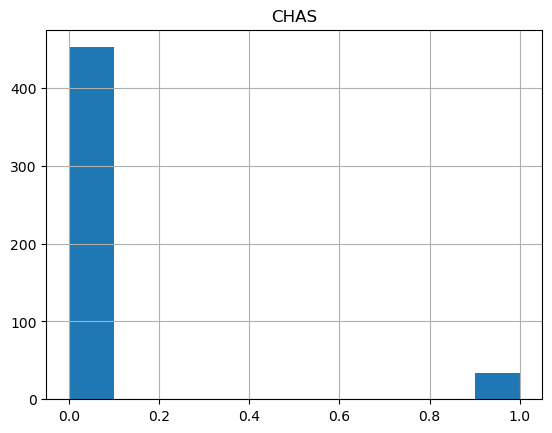

In [36]:
df.hist(column='CHAS')
plt.show()

CHAS only takes on two values, 0 and 1 with most of them 0's. It is consistent with what the describe() reports; especially, the third quartile of CHAS is 0

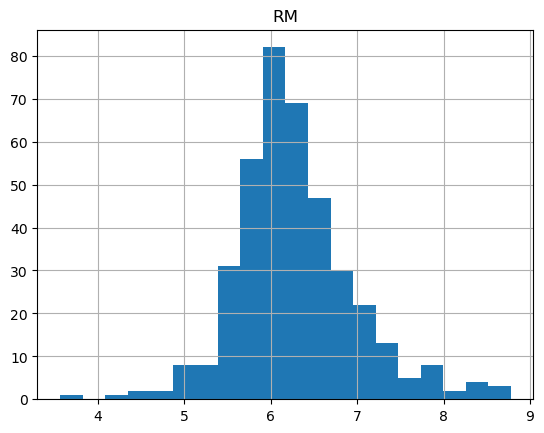

In [87]:
# Histogram of RM
df.hist(column='RM', bins=20)
plt.show()

The distribution of RM appears normal and symmetric. The symmentric aligns with what we observed from the output of describe(), as the mean of RM 6.28 is close to its median 6.21

<Axes: ylabel='MEDV'>

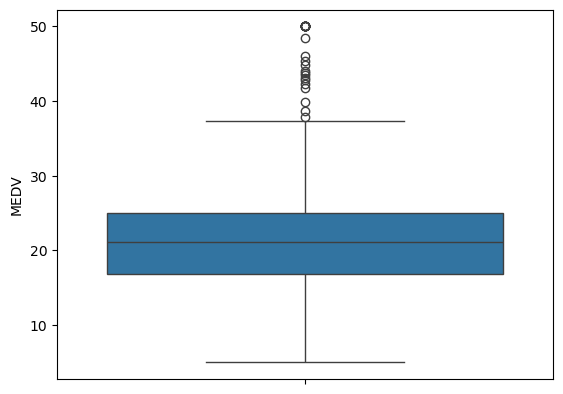

In [77]:
sns.boxplot(df['MEDV'])

<Axes: ylabel='LSTAT'>

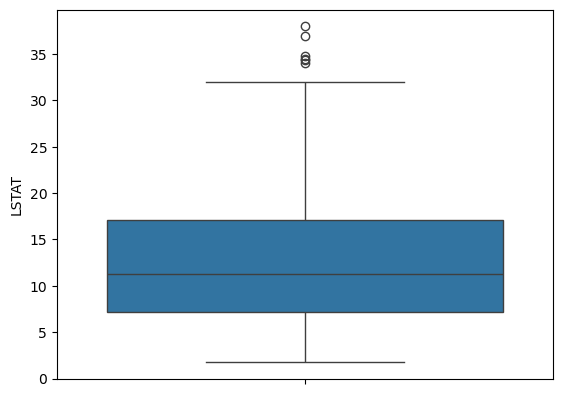

In [83]:
sns.boxplot(df['LSTAT'])

# Correlation Matrix

In [38]:
corr_matrix = df.corr().round(2)
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.19,0.40,-0.05,0.42,-0.22,0.35,-0.37,0.62,0.58,0.28,-0.38,0.44,-0.39
ZN,-0.19,1.00,-0.53,-0.04,-0.51,0.32,-0.56,0.66,-0.31,-0.31,-0.41,0.17,-0.41,0.37
INDUS,0.40,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.73,0.39,-0.36,0.59,-0.48
CHAS,-0.05,-0.04,0.06,1.00,0.08,0.10,0.08,-0.09,0.00,-0.03,-0.11,0.05,-0.05,0.18
NOX,0.42,-0.51,0.76,0.08,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.58,-0.43
RM,-0.22,0.32,-0.39,0.10,-0.30,1.00,-0.25,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.56,0.64,0.08,0.73,-0.25,1.00,-0.74,0.46,0.51,0.27,-0.28,0.60,-0.39
DIS,-0.37,0.66,-0.71,-0.09,-0.77,0.21,-0.74,1.00,-0.49,-0.53,-0.23,0.29,-0.49,0.25
RAD,0.62,-0.31,0.60,0.00,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.48,-0.38
TAX,0.58,-0.31,0.73,-0.03,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


The Last row column is used to identify features that are most correlated with the target **MEDV(Medium Value of owner-occupied home's in 1000$)**. **LSTAT (Percentage of lower status of the population)** is mostly negative correlated with the target (-0.74) which means that the percentage of lower status drops, the medium houses values increases; while **RM(the average number of rooms per dwelling)** is most positively correlated with **MEDV(0.70)**. Which means that the house value increases as the number of rooms increases.

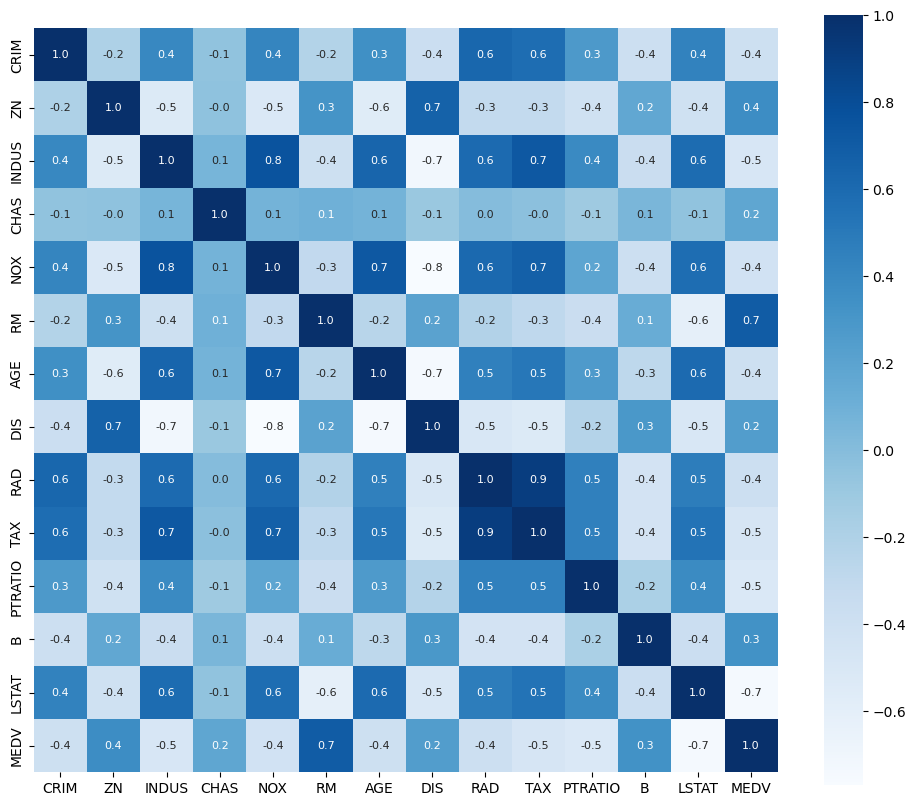

In [15]:
# Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Blues')
plt.show()

# Feature Selection


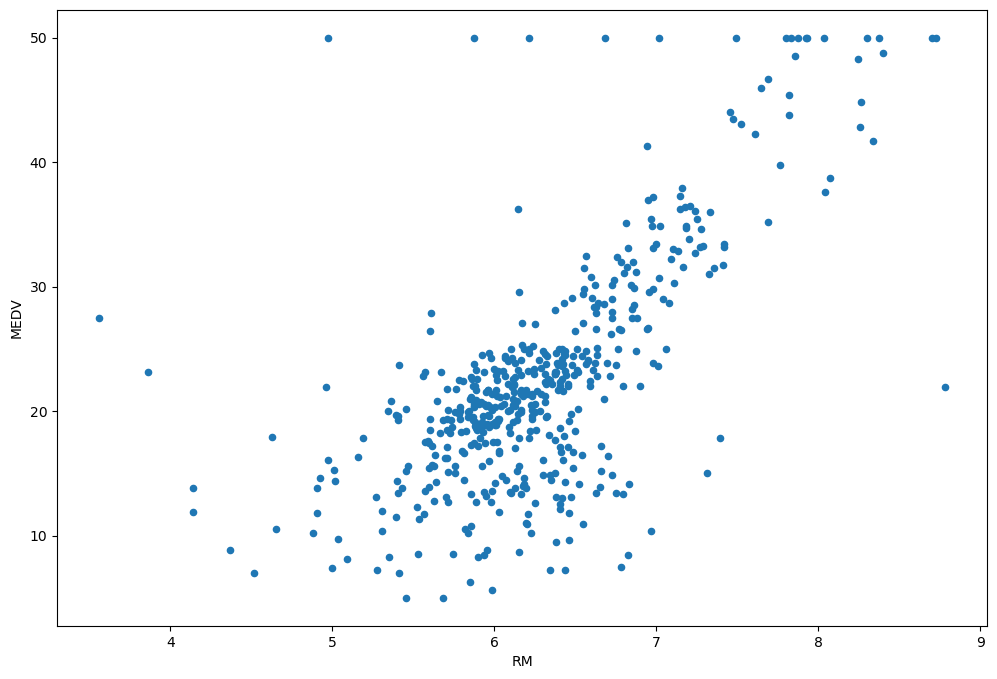

In [16]:
df.plot(kind='scatter', x = 'RM', y = 'MEDV', figsize=(12,8));

The price increases as the value of **RM** increases linearly. There are few outliers that appear to be outside of the overall pattern. For example, one point on the centre right corresponds to a house with 9 rooms but a mediun value slightly above **$20K**. Homes with similar values usually have around 6 rooms. In addition, the data seems to have a ceiling; that is the maximum medium value is capped at 50.

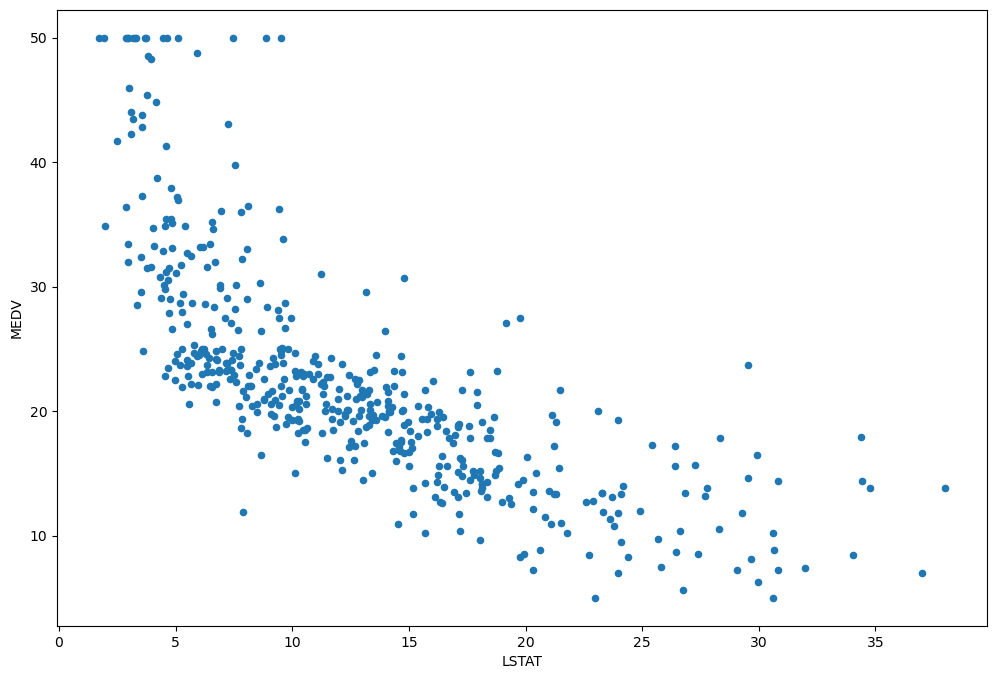

In [17]:
df.plot(kind='scatter', x = 'LSTAT', y = 'MEDV', figsize=(12,8));

On the other hand, prices tend to decrease with an increase in **LSTAT**; and the trend ins't as linear. 

Of the two features, **RM** appears a better choice for predicting **MEDV**. Thus we start with a univariate linear regression: **MEDV = b + m * RM**
Ths can be wriiten as **Y = b + mX**. 

Models require a two-dimensional feature matrix (X, 2darray or a pandas DataFrame) and a one-dimensional target array(Y).

In [39]:
X = df[['RM']]
print(X.shape)

(506, 1)


Similarly, we define our target to be the column **MEDV** in boston ans assign it in a variablr called **Y**

In [41]:
y = df['MEDV']
print(y.shape)

(506,)


# Modeling


In [42]:
# Instantiate the Model
model = LinearRegression()


# Train Test Split

In [43]:
# Split the data into Train and Test Sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state=1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(354, 1)
(354,)
(152, 1)
(152,)


# Model Fitting


In [45]:
model.fit(X_train, y_train)

LinearRegression()

# Parameter Estimates
The linear regression model has been fitted, what it means is that both parameters, the **intercept** and the **slope**, have been learned. By convention, all model parameters have trailling underscores. For example to access the estimated intercent from the model, rounded to the 2nd decimal place for better display:

In [46]:
model.intercept_.round(2)

-30.57

Silimarly, the estimated coefficient of **RM** is:

In [47]:
model.coef_.round(2)

array([8.46])

The two parameters represent the **intercept** and **slope** of the line fit to the data. Out fitted model is **MEDV = -30.57 + 8.46 * RM**. For one unit increase in **RM**, the median home value price would go up by **$8460**. 

# Prediction


In [50]:
y_test_pred = model.predict(X_test)
y_test_pred.shape
y_test_pred[:10]

array([27.37898421, 26.08443719, 20.44935016, 19.16326423, 14.79734095,
       23.3430435 , 25.52600514, 20.80471601, 19.78092392, 23.72379262])

In [ ]:
y_test.shape

In [51]:
model.intercept_ + model.coef_ * 6.5

array([24.42606323])

When the average number of rooms per dwelling is **6.5**, the model predicts a home value of **$24,426.06**

This value is the same as we plug in the line b + m * X where **b** is the estimated intercept from the model, and **m** is the estimate slope.

# Model Evaluation
How good is our Model?


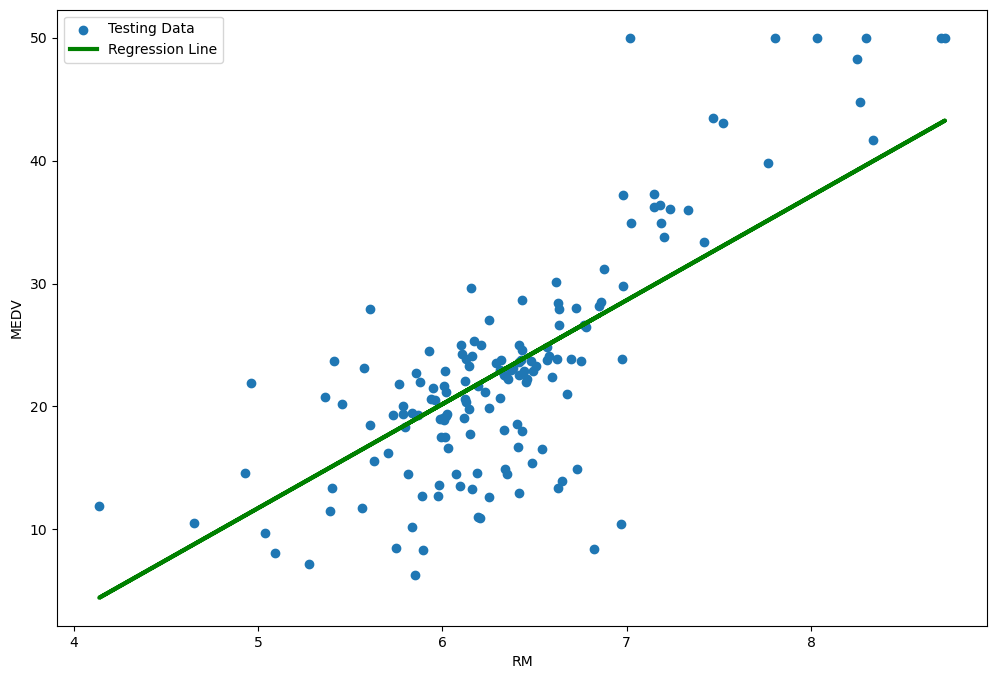

In [53]:
plt.figure(figsize=(12,8))
plt.scatter(X_test, y_test, label='Testing Data');
plt.plot(X_test, y_test_pred, label='Regression Line', linewidth=3, color="green")
plt.xlabel('RM');
plt.ylabel('MEDV')
plt.legend(loc='upper left')
plt.show()


Some point sit on the line, but some are away from it. We can measure the distance between a point to the line along the vertical line, and this distance is reffered to as **Residual** or error. 

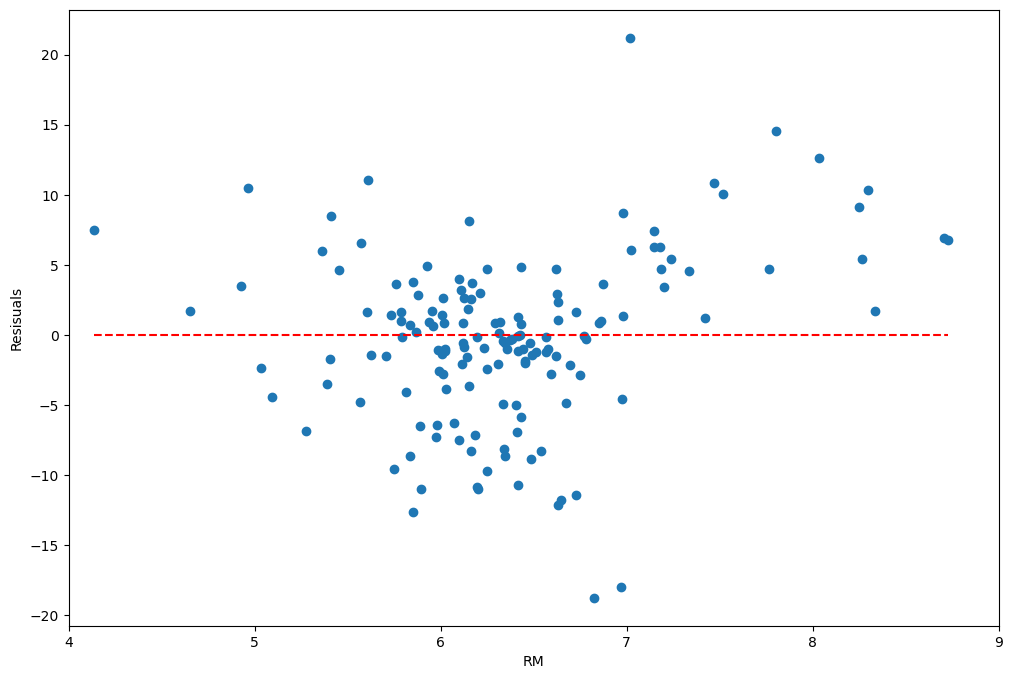

In [54]:
# Calculate the residual
residuals = y_test - y_test_pred

# pot the residuals
plt.figure(figsize=(12,8))
plt.scatter(X_test, residuals)
plt.hlines(y= 0, xmin = X_test.min(), xmax=X_test.max(), linestyle='--', color='red')
# set xlim
plt.xlim((4, 9))
plt.xlabel('RM');
plt.ylabel('Resisuals')
plt.show()

Residuals are scattered around the horizontal line, y=0, with no particular pattern. This seemingly random distribution is a sign that the model is working. Ideally the residual should be symmetrically and randomly spaced around the horizontal axis; If the residual plot shows some pattern, linear or nonlinear, that's an indication that our model has room for improvement.

# Mean Squared Error
when each residual is near 0, it suggests a good fit. Lets compute for the first five resisuals in oor model.

In [55]:
residuals[: 5]

307    0.821016
343   -2.184437
47    -3.849350
67     2.836736
362    6.002659
Name: MEDV, dtype: float64

In [56]:
residuals.mean()

-0.23645087766389092

**-0.24** is close to 0, but there is a problem: residuals can be positive or negative so taking the average cancels them out. Thats not an accurate metric. To solve this, wwe take a sqaure of each residual, then take the mean of all squares. This is called  **Mean Squared Error(MSE)**

In [58]:
# Getting the Mean Squared Error
mean_squared_error(y_test, y_test_pred)

36.51721473083861

In general, the smaller the MSE, the better, yet there is no absolute good or bad threshold. We can define it based of the dependent variable, i.e **MEDV** in the test set. y_test ranges from **6.3** to 50 with a variance 92.26. Compared to the total variance, MSE of 36.52 is not bad.

# R-Squared
It is the proportion of total variations explained by the model. Here, around 60% of variability in the testing data is explained by our model.


In [60]:
model.score(X_test, y_test)

0.6015774471545624

In [61]:
# Total Variation
((y_test - y_test.mean())**2).sum()
 

13931.482039473683

In [62]:
# Variations that the model fails to capture
(residuals**2).sum()

5550.616639087469

In [64]:
#Total Variations from the data is

1-5550.6166390874705/13931.482039473683

0.6015774471545623

A perfect model explains all the variation in the data. Note R-Squared is between 0 and 100% 0% percent indicates that the model explains none of the variability of the response data around its mean while 100% indicates the model explains all of it.

# Multivariate Linear Regression

## Overview
Recall LSTAT(% lower status in population) is mostly negatively correlated to the home price. We can add the feature and build a **Multivariate linear regression model** where the home price depends on both RM and LSTAT lineally:

**MEDV = b<sub>0</sub>+b<sub>1</sub> * RM + b<sub>2</sub> * LSTAT*

To find the intercept b<sub>0</sub> and coefficients b<sub>1</sub> and b<sub>2</sub>, all are the except for the data preparation part, we are now dealing with two features.

In [ ]:
# Data Preparation
#X2 = df[['RM', 'LSTAT']]
#Y = df['MEDV']

#X2_train, X2_test, Y_train, Y_test = train_test_split(X2, Y, test_size=0.3, random_state=1)

#regressor = LinearRegression()

#regressor.fit(X2_train, Y_train)
